In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
%matplotlib inline

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

BETA FUNCTION IS USED


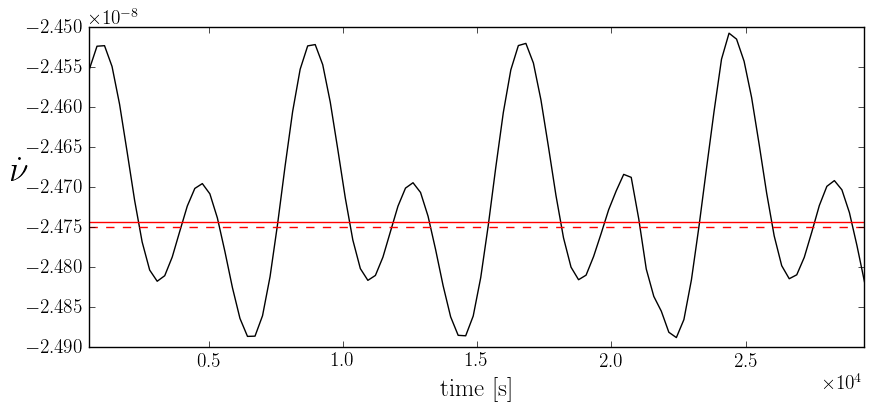

In [27]:
epsI3 = 8e-6
omega0 = 1e2
epsA = 7e-9
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3e4
a0 = 2.0

n = 50000
error = 1e-13

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True
                 )

#File_Functions.PrintParameterDictionary(file_name)

fig, ax1 = plt.subplots(figsize=(10, 4))

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic=["EM"], divisor=7)

ax1.plot(time, SignalModel_01(theta, time), "r--")

plt.show()

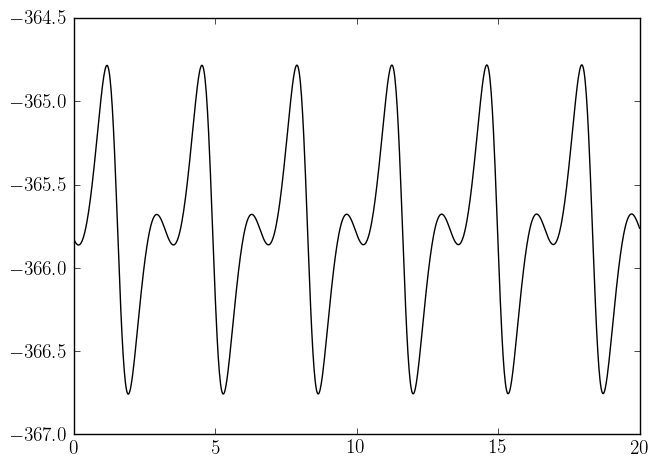

In [58]:
from numpy import cos, sin

def SignalModel_01(theta, t):
    phidot, phiddot, epsilon, psi0, theta, chi = theta
    psidot = -epsilon * phidot
    return phidot + phiddot*t + (
              psidot**2*(2*(sin(chi)*cos(theta) - sin(theta)*sin(psidot*t + psi0)*cos(chi))
                      *(sin(chi)*sin(theta)*sin(psidot*t + psi0) + cos(chi)*cos(theta))*sin(chi)
                      - ((sin(chi)*sin(psidot*t + psi0)*cos(theta) - sin(theta)*cos(chi))**2
                      + sin(chi)**2*cos(psidot*t + psi0)**2)*cos(chi))*sin(chi)*sin(theta)
                      *cos(psidot*t + psi0)/((sin(chi)*sin(psidot*t + psi0)*cos(theta)
                    - sin(theta)*cos(chi))**2 
                      + sin(chi)**2*cos(psidot*t + psi0)**2)**2
                        )

theta = [1e-8, 0, epsI3, 0, np.radians(a0), np.radians(chi0)]

theta = np.array([ -3.65771362e+02,   1.74281793e-04,   5.11679835e-03,
                   -1.32698820e+00,   3.27300468e-01,   1.15841874e+00])

time = np.linspace(0, 20, 1000)
plt.plot(time, SignalModel_01(theta, time))
plt.show()